In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, svm
from sklearn.metrics import f1_score

def get_iris():
    iris = datasets.load_iris()
    X = iris.data
    y = iris.target

    X = X[y != 0, :2]
    y = y[y != 0]

    n_sample = len(X)

    np.random.seed(0)
    order = np.random.permutation(n_sample)
    X = X[order]
    y = y[order].astype(float)
    return X,y 

def get_linear_seperable_data():
    X, y = datasets.make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
    rng = np.random.RandomState(2)
    X += 2 * rng.uniform(size=X.shape)
    return X, y

def split_data(X,y):
    n_sample = len(X)
    X_train = X[: int(0.9 * n_sample)]
    y_train = y[: int(0.9 * n_sample)]
    X_test = X[int(0.9 * n_sample) :]
    y_test = y[int(0.9 * n_sample) :]
    return X_train, y_train, X_test, y_test



def plot_svm(clf,X,y,name):
    X_train, y_train, X_test, y_test = split_data(X,y)
    clf.fit(X_train, y_train)

    plt.figure()
    plt.clf()
    plt.scatter(
        X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired, edgecolor="k", s=20
    )

    # Circle out the test data
    plt.scatter(
        X_test[:, 0], X_test[:, 1], s=80, facecolors="none", zorder=10, edgecolor="k"
    )

    plt.axis("tight")
    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])
    
    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
    plt.contour(
        XX,
        YY,
        Z,
        colors=["k", "k", "k"],
        linestyles=["--", "-", "--"],
        levels=[-0.5, 0, 0.5],
    )
    f1 = f1_score(clf.predict(X_test),y_test)
    plt.title(name + f" f1:{f1}")
    return plt


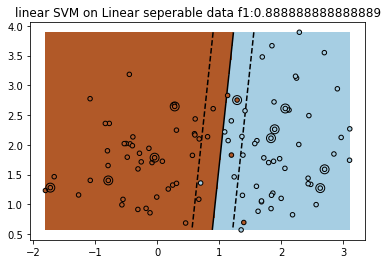

In [2]:
X,y = get_linear_seperable_data()
plt = plot_svm(svm.LinearSVC(),X,y,f"linear SVM on Linear seperable data")
plt.show()

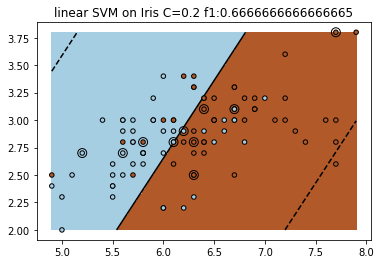

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


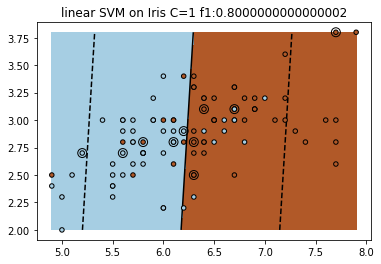

In [3]:
X,y = get_iris()
for c in [0.2,1]:
    plt = plot_svm(svm.LinearSVC(C=c),X,y,f"linear SVM on Iris C={c}")
    plt.show()

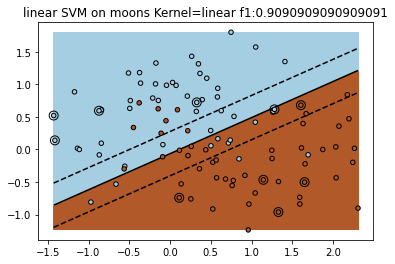

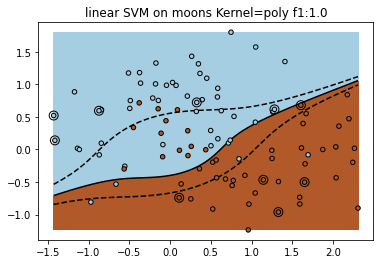

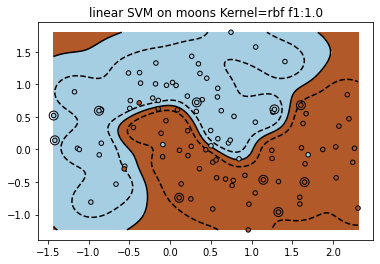

In [4]:
X, y = datasets.make_moons(noise=0.4, random_state=0)
for kernel in ['linear','poly','rbf']:
    plt = plot_svm(svm.SVC(kernel=kernel,gamma=10, C=1),X,y,f"linear SVM on moons Kernel={kernel}")
    plt.show()

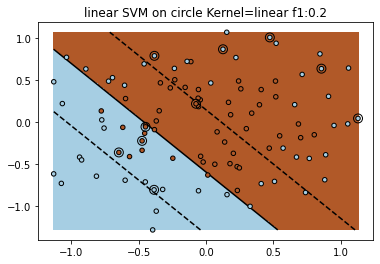

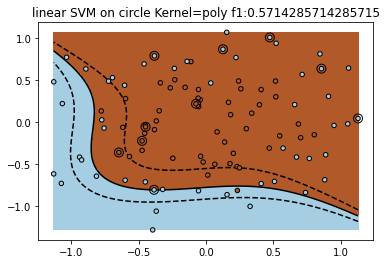

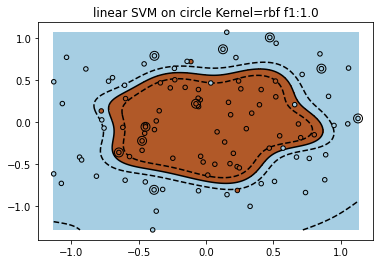

In [5]:
X,y = datasets.make_circles(noise=0.2, factor=0.5, random_state=1)
for kernel in ['linear','poly','rbf']:
    plt = plot_svm(svm.SVC(kernel=kernel,gamma=10, C=1),X,y,f"linear SVM on circle Kernel={kernel}")
    plt.show()